In [1]:
import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')
import tensorflow as tf
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import imdb

CONTEXT: The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
data = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
print("train_data ", train_data.shape)
print("train_labels ", train_labels.shape)
print("_"*100)
print("test_data ", test_data.shape)
print("test_labels ", test_labels.shape)
print("_"*100)
print("Maximum value of a word index ")
print(max([max(sequence) for sequence in train_data]))
print("Maximum length num words of review in train ")
print(max([len(sequence) for sequence in train_data]))

train_data  (25000,)
train_labels  (25000,)
____________________________________________________________________________________________________
test_data  (25000,)
test_labels  (25000,)
____________________________________________________________________________________________________
Maximum value of a word index 
9999
Maximum length num words of review in train 
2494


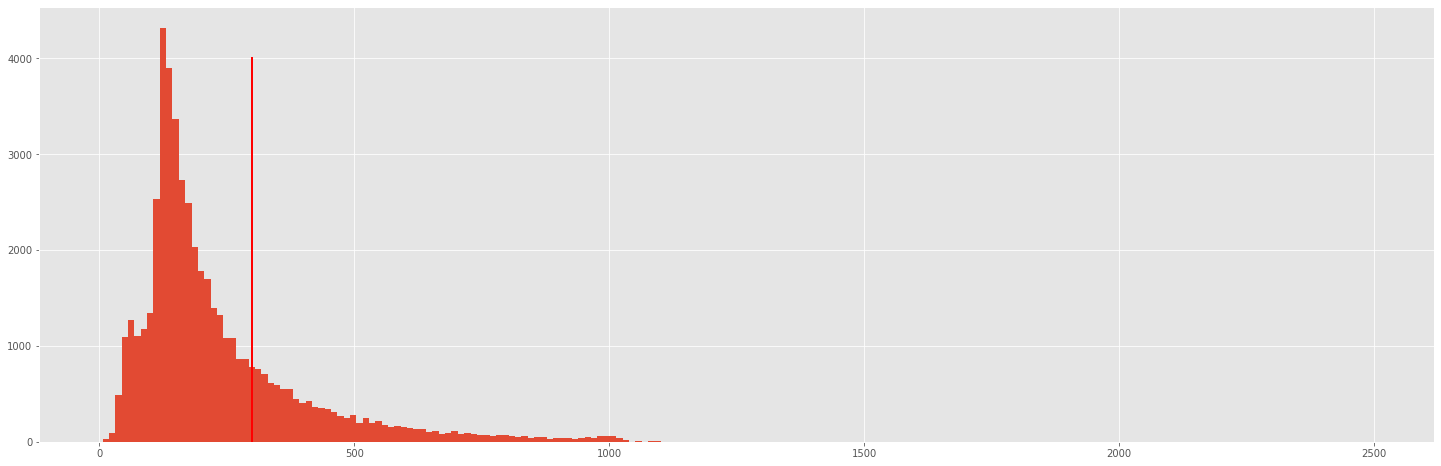

Average review length: 234.75892
Standard deviation: 173
No of reviews with length below 300: 38583


In [4]:
length = [len(i) for i in data]
plt.figure(figsize=(25,8))
plt.hist(length, bins= 200)
plt.plot([300, 300], [0, 4000], 'r', linewidth=2.0)
plt.show()
print("Average review length: {}".format(np.mean(length)))
print("Standard deviation: {}".format(round(np.std(length))))
print("No of reviews with length below 300: {}".format(sum(i < 301 for i in length)))

In [5]:
# See an actual review in words
# Reverse from integers to words using the DICTIONARY (given by keras...need to do nothing to create it)

word_index = imdb.get_word_index()

reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[145]])

print(decoded_review)

1654784/1641221 [==============================] - 0s 0us/step
? this movie is simply wonderful it's got it all laughter sorrow beauty poetry truth all in a simple yet intense story like life you won't get distracted for a second br br 10 10 br br p s somebody tell hollywood you need a good story to make a good movie and there are so many good stories out there


In [6]:
# VECTORIZE as one cannot feed integers into a NN 
# Encoding the integer sequences into a binary matrix - one hot encoder basically
# From integers representing words, at various lengths - to a normalized one hot encoded tensor (matrix) of 10k columns

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

x_train  (25000, 10000)
x_test  (25000, 10000)


In [8]:
# VECTORIZE the labels too - NO INTEGERS only floats into a tensor...(rare exceptions)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

y_train  (25000,)
y_test  (25000,)


In [9]:
# Set a VALIDATION set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("x_val ", x_val.shape)
print("partial_x_train ", partial_x_train.shape)
print("y_val ", y_val.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (10000, 10000)
partial_x_train  (15000, 10000)
y_val  (10000,)
partial_y_train  (15000,)


In [10]:
# NN MODEL

# Use of DROPOUT
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
# FIT / TRAIN model

NumEpochs = 10
BatchSize = 512

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Epoch 1/10
30/30 [==============================] - 3s 40ms/step - loss: 1.4799 - accuracy: 0.5923 - val_loss: 0.8681 - val_accuracy: 0.8003
Epoch 2/10
30/30 [==============================] - 0s 16ms/step - loss: 0.7764 - accuracy: 0.7149 - val_loss: 0.6772 - val_accuracy: 0.8358
Epoch 3/10
30/30 [==============================] - 0s 15ms/step - loss: 0.6839 - accuracy: 0.7629 - val_loss: 0.6181 - val_accuracy: 0.8468
Epoch 4/10
30/30 [==============================] - 0s 16ms/step - loss: 0.6524 - accuracy: 0.7948 - val_loss: 0.5855 - val_accuracy: 0.8513
Epoch 5/10
30/30 [==============================] - 0s 14ms/step - loss: 0.6304 - accuracy: 0.8127 - val_loss: 0.5608 - val_accuracy: 0.8557
Epoch 6/10
30/30 [==============================] - 0s 15ms/step - loss: 0.6172 - accuracy: 0.8307 - val_loss: 0.5579 - val_accuracy: 0.8602
Epoch 7/10
30/30 [==============================] - 0s 15ms/step - loss: 0.6092 - accuracy: 0.8347 - val_loss: 0.5572 - val_accuracy: 0.8637
Epoch 8/10
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [12]:
def decode_review(x, y):
  
  word_index = imdb.get_word_index()

  
  word_index = {k: (v + 3) for k, v in word_index.items()}
  word_index['<PAD>'] = 0
  word_index['<START>'] = 1
  word_index['<UNK>'] = 2  
  word_index['<UNUSED>'] = 3
  
  word_index_1= {i: w for w, i in word_index.items()}
  
  words = (' '.join(word_index_1[i] for i in x if i!=0))
  #print(f'Review: {words}')
  print(f'Actual Sentiment: {y}')
  return word_index, word_index_1

word_index, word_index_1 = decode_review(x_train[0], y_train[0])

Actual Sentiment: 1.0


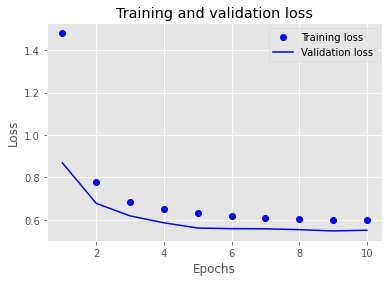

In [13]:
# VALIDATION LOSS curves

plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

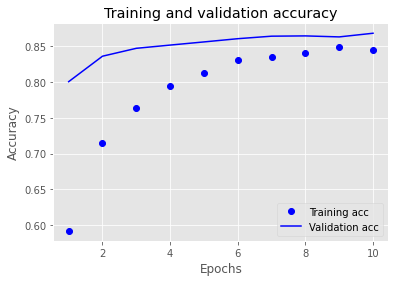

In [14]:
# VALIDATION ACCURACY curves

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, (len(history_dict['accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
y_pred = model.predict(x_test)

Prediction on one sample

In [16]:
decode_review(x_test[21],y_test[21])
print(f'Predicted sentiment: {y_pred[21][0].round()}')

Actual Sentiment: 1.0
Predicted sentiment: 1.0


In [17]:
decode_review(x_test[105],y_test[105])
print(f'Predicted sentiment: {y_pred[105][0].round()}')

Actual Sentiment: 0.0
Predicted sentiment: 0.0


In [18]:
decode_review(x_test[1000],y_test[1000])
print(f'Predicted sentiment: {y_pred[1000][0].round()}')

Actual Sentiment: 0.0
Predicted sentiment: 0.0


CONTEXT: Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Embedding, Flatten, SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [20]:
import json
data = [json.loads(line) for 
        line in open('/content/drive/MyDrive/AIML/NLP/Sarcasm_Headlines_Dataset.json', 'r')]

In [21]:
new_df = pd.DataFrame.from_dict(data) 

In [22]:
new_df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [23]:
new_df2 = new_df.drop(['article_link'],axis=1)

In [24]:
new_df2.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [25]:
new_df2["headline_len"] = new_df2["headline"].str.len()

In [26]:
new_df2.tail()

,headline,is_sarcastic,headline_len
26704,american politics in moral free-fall,0,36
26705,america's best 20 hikes,0,23
26706,reparations and obama,0,21
26707,israeli ban targeting boycott supporters raise...,0,60
26708,gourmet gifts for the foodie 2014,0,33


In [27]:
max_features = 10000
maxlen = 25
embedding_size = 200

In [28]:
# Choose the top 10000 words from the vocabulary
top_k = 10000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(new_df2['headline'])

In [29]:
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [30]:
# Create the tokenized vectors
train_seqs = tokenizer.texts_to_sequences(new_df2['headline'])

In [31]:
# Pad each vector to the max_length of the captions
# If you do not provide a max_length value, pad_sequences calculates it automatically
X = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post',maxlen=maxlen)

In [32]:
Y = new_df2["is_sarcastic"].values

In [33]:
print(type(Y))

<class 'numpy.ndarray'>


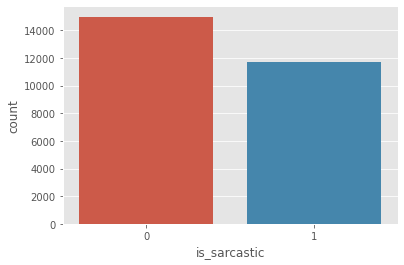

In [34]:
sns.countplot(x='is_sarcastic',data=new_df2);

In [35]:
tokenizer.word_index

{'<unk>': 1,
 'to': 2,
 'of': 3,
 'the': 4,
 'in': 5,
 'for': 6,
 'a': 7,
 'on': 8,
 'and': 9,
 'with': 10,
 'is': 11,
 'new': 12,
 'trump': 13,
 'man': 14,
 'from': 15,
 'at': 16,
 'about': 17,
 'you': 18,
 'this': 19,
 'by': 20,
 'after': 21,
 'up': 22,
 'out': 23,
 'be': 24,
 'how': 25,
 'as': 26,
 'it': 27,
 'that': 28,
 'not': 29,
 'are': 30,
 'your': 31,
 'his': 32,
 'what': 33,
 'he': 34,
 'all': 35,
 'just': 36,
 'who': 37,
 'has': 38,
 'will': 39,
 'more': 40,
 'one': 41,
 'into': 42,
 'report': 43,
 'year': 44,
 'why': 45,
 'have': 46,
 'area': 47,
 'over': 48,
 'donald': 49,
 'u': 50,
 'day': 51,
 'says': 52,
 's': 53,
 'can': 54,
 'first': 55,
 'woman': 56,
 'time': 57,
 'like': 58,
 'her': 59,
 "trump's": 60,
 'old': 61,
 'no': 62,
 'get': 63,
 'off': 64,
 'an': 65,
 'life': 66,
 'people': 67,
 'obama': 68,
 'now': 69,
 'house': 70,
 'still': 71,
 "'": 72,
 'women': 73,
 'make': 74,
 'was': 75,
 'than': 76,
 'white': 77,
 'back': 78,
 'my': 79,
 'i': 80,
 'clinton': 81,
 '

In [36]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

29660


In [37]:
EMBEDDING_FILE = '/content/drive/MyDrive/AIML/NLP/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Define model
Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. In the end add a final dense layer with sigmoid activation for binary classification.
We have not trained the embeddings generated from glove data as we are getting good results without it as well¶

In [38]:
lstm_out = 196

# define the model
model = Sequential()
model.add(Embedding(num_words,
                    embedding_size,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=maxlen,
                    trainable=False))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [39]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 200)           5932000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 25, 200)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 392)              622496    
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 393       
                                                                 
Total params: 6,554,889
Trainable params: 622,889
Non-

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(21367, 25) (21367,)
(5342, 25) (5342,)


In [51]:
batch_size = 64
history = model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size, 
                    verbose = 1, validation_split=0.1)

Epoch 1/20
301/301 [==============================] - 64s 213ms/step - loss: 0.2324 - accuracy: 0.9002 - val_loss: 0.3114 - val_accuracy: 0.8746
Epoch 2/20
301/301 [==============================] - 64s 212ms/step - loss: 0.2175 - accuracy: 0.9098 - val_loss: 0.3284 - val_accuracy: 0.8708
Epoch 3/20
301/301 [==============================] - 64s 214ms/step - loss: 0.2052 - accuracy: 0.9148 - val_loss: 0.3139 - val_accuracy: 0.8732
Epoch 4/20
301/301 [==============================] - 63s 210ms/step - loss: 0.1926 - accuracy: 0.9199 - val_loss: 0.3137 - val_accuracy: 0.8793
Epoch 5/20
301/301 [==============================] - 63s 210ms/step - loss: 0.1848 - accuracy: 0.9239 - val_loss: 0.3067 - val_accuracy: 0.8802
Epoch 6/20
301/301 [==============================] - 64s 213ms/step - loss: 0.1764 - accuracy: 0.9275 - val_loss: 0.3296 - val_accuracy: 0.8723
Epoch 7/20
301/301 [==============================] - 64s 212ms/step - loss: 0.1699 - accuracy: 0.9296 - val_loss: 0.3146 - val_ac

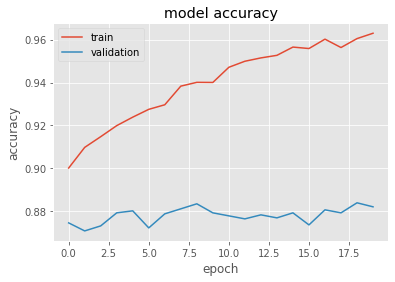

In [52]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

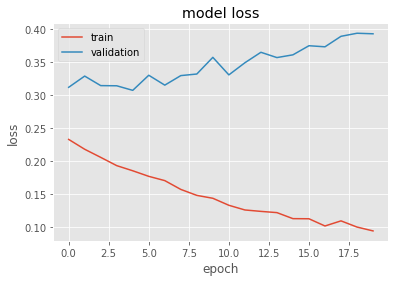

In [53]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

In [54]:
loss, accuracy = model.evaluate(X_test, Y_test)

167/167 [==============================] - 3s 18ms/step - loss: 0.4092 - accuracy: 0.8787


In [55]:
print(f'My test loss is {loss*100:.2f}% and test accuracy is {accuracy*100:.2f}%')

My test loss is 40.92% and test accuracy is 87.87%


In [56]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

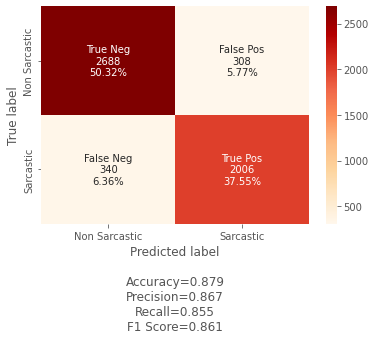

In [57]:
predict_x=model.predict(X_test)
cf_matrix = confusion_matrix(Y_test, predict_x.round())
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Non Sarcastic','Sarcastic']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='OrRd')

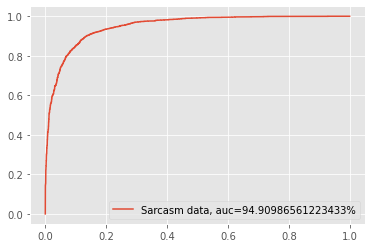

In [58]:
np.set_printoptions(precision=2)
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Sarcasm data, auc="+str(auc*100)+"%")
plt.legend(loc=4)
plt.show();

The model does a fairly decent job of predicting sarcastic comments with test auc of ~95%